# **Installing EasyOCR to the Machine**

In [33]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Dependencies**

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import imutils

import easyocr

In [35]:
#load the images

image= cv2.imread('/content/168.jpg')

# **Filtering and Edge detection**
OpenCV

In [36]:
filter= cv2.bilateralFilter(gray, 11,17,17) 
edge= cv2.Canny(filter, 30,200) 

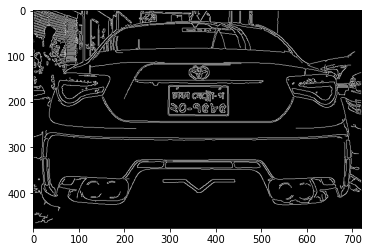

In [37]:
#Converting color

plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

**Extracting Counters**

In [38]:
ext_count= cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours= imutils.grab_contours(ext_count)
contours= sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [39]:
location= None

for contour in contours:
    apprx= cv2.approxPolyDP(
        contour, 10, True)
    
    if len(apprx)==4:
      location=apprx
      
      break

In [40]:
location

array([[[296, 166]],

       [[299, 231]],

       [[428, 229]],

       [[426, 166]]], dtype=int32)

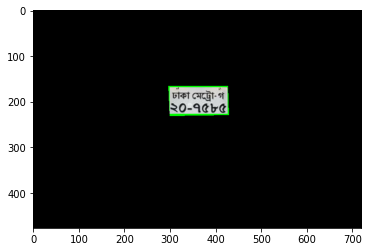

In [42]:
#masking
#extracting the plate

msk= np.zeros(gray.shape, np.uint8)

extracted_plate= cv2.drawContours(msk, [location], 0,255, -1)
extracted_plate= cv2.bitwise_and(img, img, mask=msk)

plt.imshow(cv2.cvtColor(extracted_plate, cv2.COLOR_BGR2RGB))

In [46]:
(x, y)= np.where(mask==255)

(x1, y1)= (np.min(x), np.min(y))
(x2, y2)= (np.max(x), np.max(y))

final_plate= gray[x1:x2+1, 
                  y1:y2+1]

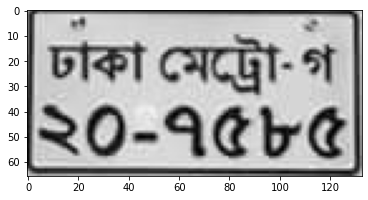

In [47]:
#final plate

plt.imshow(cv2.cvtColor(final_plate, cv2.COLOR_BGR2RGB))

# **Apply EasyOCR**

In [48]:
read_char= easyocr.Reader(['bn'])  #bangla character reading with 'bn'

detected= read_char.readtext(final_plate)  #read from final extracted plate

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [49]:
#show the detected number

detected

[([[4, 6], [126, 6], [126, 36], [4, 36]], 'ঢাকা মেট্রো গ', 0.6012377792431932),
 ([[2, 32], [130, 32], [130, 64], [2, 64]], '২০-৭৫৮৫', 0.9955905703947492)]